## Evaluation of NIPMAP output 

### NIPMAP was run on 154 samples of spatial images. 7 niches were discovered in the myeloma dataset from Lukas Hatscher.

### This jupyter notebook will read the cells_niches_coordinates_interfaces.csv produced from creating_csv_for_plots.R script & assign a niche (a1-a7) to each cell with unique cell_id's, based on max niche weight.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#reading the csv created from json files in R as a pandas dataframe 
data = pd.read_csv('lukas_data/7n_output/cells_niches_coordinates_interfaces.csv')

#defining the number of niches 
niche_columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']

#create the 'niche' column in the pandas dataframe with the name of the column that has the max weight in each row (for each cell)
data['niche'] = data[niche_columns].idxmax(axis=1)

#defining interfaces 
intf_columns = ['a1a2', 'a1a3', 'a1a4', 'a1a5', 'a1a6', 'a1a7', 'a2a3', 'a2a4', 'a2a5', 'a2a6', 'a2a7', 'a3a4', 'a3a5', 'a3a6', 'a3a7', 'a4a5', 'a4a6', 'a4a7', 'a5a6', 'a5a7', 'a6a7']

#create the 'interface' column in the pandas dataframe with the name of the column that has the max weight in each row (for each cell)
data['interface'] = data[intf_columns].idxmax(axis=1)

#rewriting column order 
new_column_order = ['niche','interface', 'SampleID', 'cell_id', 'cell_type', 'x', 'y']

data = data[new_column_order]

#saving the csv, each cell has a niche & interface to which it's most likely to belong (!not either or)
data.to_csv("./7n_output/every_cell_one_niche_interface.csv")

#plotting heatmap with niche compositions - how many cells of which cell type are allocated to the niche (based on max niche weights for each cell)
niche_counts = data.groupby('niche')['cell_type'].value_counts().unstack(fill_value=0)

phenotype_counts_niches = pd.DataFrame(niche_counts)

interface_counts = data.groupby('interface')['cell_type'].value_counts().unstack(fill_value=0)

phenotype_counts_interfaces = pd.DataFrame(interface_counts)

niches_interfaces_counts = [phenotype_counts_niches, phenotype_counts_interfaces]

#concatenate two dataframes with niches & interfaces counts into one 
ni_counts = pd.concat(niches_interfaces_counts)

 #transpose the result 
ni_counts_T = ni_counts.T

#define the interfaces and niches that will be included in the heatmao 
columns_to_normalise = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a1a2', 'a1a3', 'a1a4', 'a1a5', 'a1a6', 'a1a7', 'a2a3', 'a2a4', 'a2a5', 'a2a6', 'a2a7', 'a3a4', 'a3a5', 'a3a6', 'a3a7', 'a4a5', 'a4a6', 'a4a7', 'a5a6', 'a5a7', 'a6a7']  # Specify the columns you want to normalize

#normalize each column to sum to 1
ni_counts_norm = ni_counts_T[columns_to_normalise].div(ni_counts_T[columns_to_normalise].sum(axis=0), axis=1)

#apply styling with gradient for visualization
ni_counts_norm.style.background_gradient(cmap='viridis').set_properties(**{'font-size': '20px'})

,a1,a2,a3,a4,a5,a6,a7,a1a2,a1a3,a1a4,a1a5,a1a6,a1a7,a2a3,a2a4,a2a5,a2a6,a2a7,a3a4,a3a5,a3a6,a3a7,a4a5,a4a6,a4a7,a5a6,a5a7,a6a7
cell_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adipocytes,0.000886,0.001674,0.008942,0.001027,0.001482,0.000322,0.028131,0.000359,0.001822,0.000397,0.001395,0.000000,0.013572,0.001999,0.000403,0.001010,0.000000,0.015981,0.002009,0.003291,0.000989,0.041048,0.000000,0.000000,0.010825,0.000000,0.016017,0.010532
CD4+Tcells,0.012723,0.027182,0.019419,0.031207,0.025616,0.371378,0.034410,0.019727,0.013247,0.015671,0.021095,0.200633,0.016467,0.017189,0.022261,0.020001,0.204416,0.029395,0.017850,0.012575,0.197329,0.019152,0.020444,0.168187,0.033854,0.274464,0.024888,0.300949
CD68+,0.009642,0.014983,0.030400,0.057223,0.038671,0.034047,0.029039,0.013835,0.022499,0.045427,0.030858,0.020755,0.015617,0.017411,0.024242,0.020961,0.020477,0.017589,0.053705,0.037842,0.058853,0.025955,0.104444,0.057583,0.084647,0.037058,0.041695,0.045172
CD8+Tcells,0.035435,0.036977,0.029084,0.058278,0.049044,0.297972,0.049020,0.041197,0.027967,0.042254,0.058577,0.255979,0.036462,0.026828,0.044193,0.030810,0.171474,0.038698,0.034619,0.031731,0.199802,0.028846,0.085778,0.313854,0.054953,0.301679,0.050493,0.236875
Dendritic Cells,0.003098,0.005782,0.004374,0.008843,0.004763,0.047972,0.014896,0.003894,0.001752,0.002579,0.004533,0.030441,0.005861,0.002932,0.004878,0.003485,0.011574,0.011323,0.005718,0.001410,0.006429,0.007826,0.004000,0.015108,0.022227,0.017371,0.010433,0.095431
Endothelial cells,0.017473,0.003839,0.008465,0.004536,0.014643,0.001288,0.043729,0.004202,0.003995,0.001785,0.011506,0.000791,0.041086,0.003598,0.001467,0.005000,0.000178,0.015168,0.003555,0.012222,0.000000,0.032832,0.004000,0.000285,0.017741,0.002895,0.051154,0.012294
HSCs,0.005509,0.011215,0.007458,0.019626,0.015913,0.015534,0.027214,0.007686,0.003294,0.007737,0.010983,0.009686,0.015120,0.006130,0.011662,0.012122,0.011574,0.023212,0.009118,0.004231,0.009891,0.014500,0.020444,0.013683,0.045481,0.015634,0.032970,0.040247
MPO+,0.011667,0.044592,0.035381,0.014463,0.516724,0.014649,0.062925,0.023929,0.014159,0.008530,0.321304,0.006128,0.013430,0.027161,0.011076,0.299965,0.011396,0.041951,0.008886,0.340933,0.010386,0.036883,0.259556,0.004846,0.016188,0.239143,0.432581,0.015898
Macrophages/Monocytes,0.006466,0.037842,0.030890,0.356202,0.010444,0.010544,0.018920,0.019471,0.010584,0.263043,0.007671,0.003756,0.005195,0.026761,0.225401,0.010758,0.014957,0.018663,0.252994,0.006111,0.012364,0.013104,0.229778,0.175314,0.226076,0.004632,0.006025,0.005807


In [5]:
#define which columns need to be normalised (niches in this case )
columns_to_normalise = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']

# Normalize each column to sum to 1
niches_counts_norm = ni_counts_norm[columns_to_normalise].div(ni_counts_norm[columns_to_normalise].sum(axis=0), axis=1)

# Apply styling with gradient for visualization
niches_counts_norm.style.background_gradient(cmap='viridis').set_properties(**{'font-size': '20px'})

,a1,a2,a3,a4,a5,a6,a7
cell_type,,,,,,,
Adipocytes,0.000886,0.001674,0.008942,0.001027,0.001482,0.000322,0.028131
CD4+Tcells,0.012723,0.027182,0.019419,0.031207,0.025616,0.371378,0.034410
CD68+,0.009642,0.014983,0.030400,0.057223,0.038671,0.034047,0.029039
CD8+Tcells,0.035435,0.036977,0.029084,0.058278,0.049044,0.297972,0.049020
Dendritic Cells,0.003098,0.005782,0.004374,0.008843,0.004763,0.047972,0.014896
Endothelial cells,0.017473,0.003839,0.008465,0.004536,0.014643,0.001288,0.043729
HSCs,0.005509,0.011215,0.007458,0.019626,0.015913,0.015534,0.027214
MPO+,0.011667,0.044592,0.035381,0.014463,0.516724,0.014649,0.062925
Macrophages/Monocytes,0.006466,0.037842,0.030890,0.356202,0.010444,0.010544,0.018920


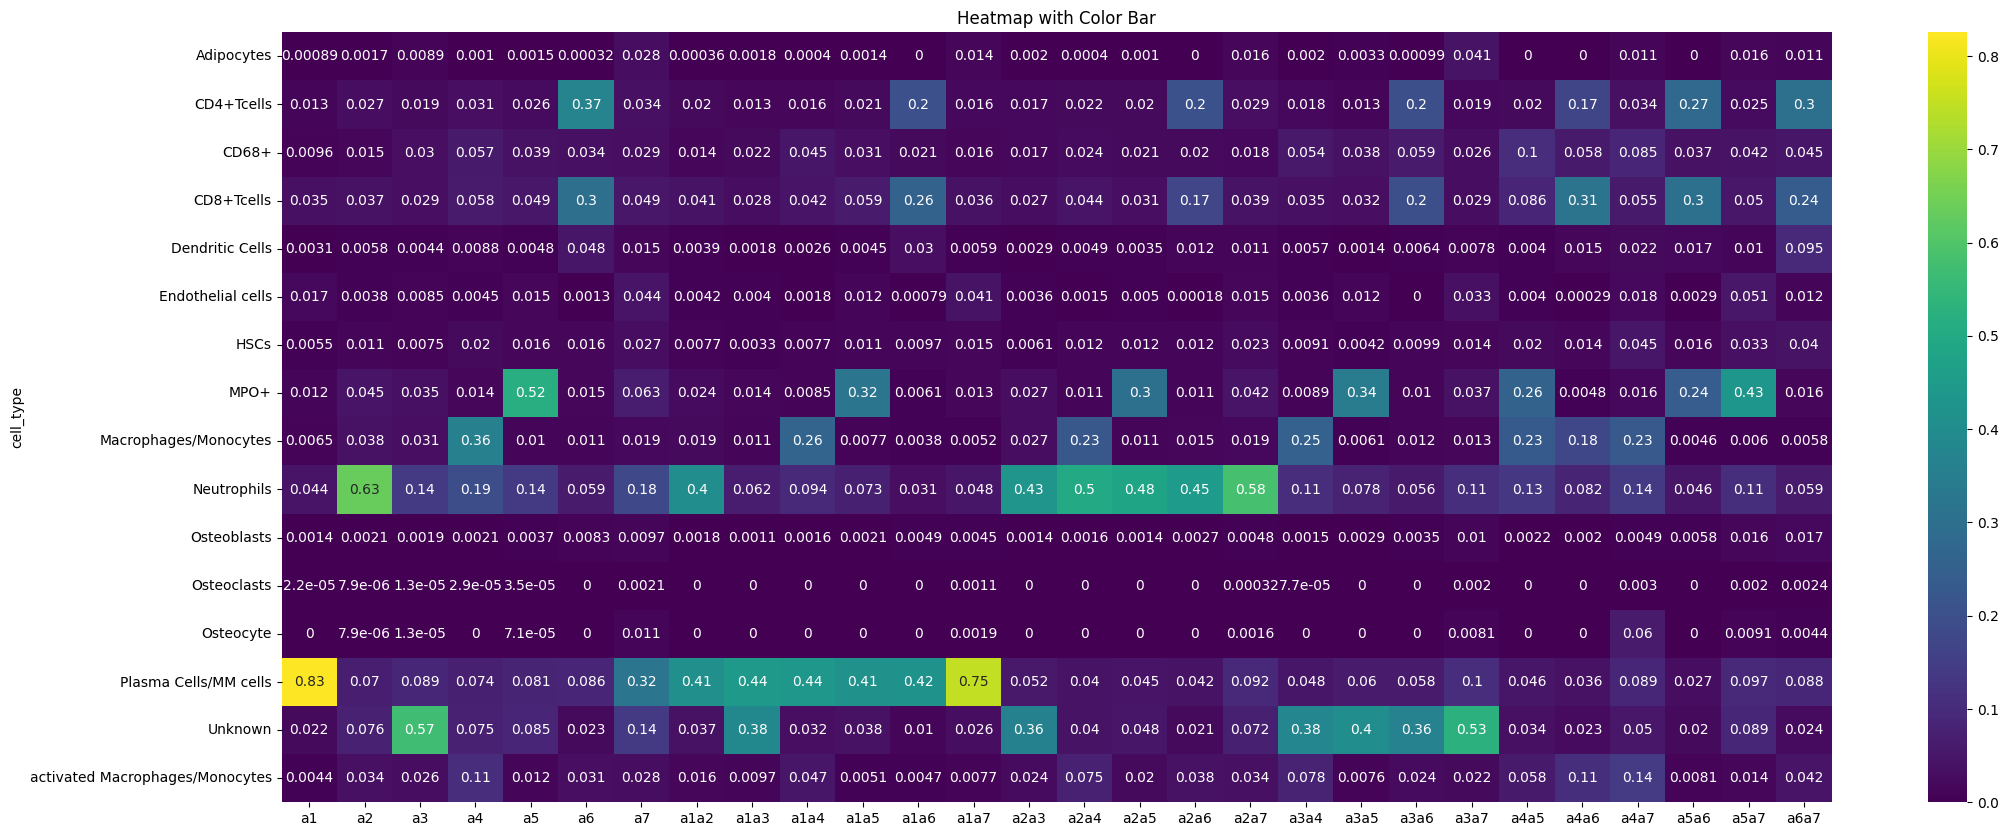

In [6]:
#plotting a correlation heatmap of cell types correlation with 7 niches & 21 interfaces 
plt.figure(figsize=(25, 10))
sns.heatmap(ni_counts_norm, cmap='viridis', annot=True, cbar=True)

plt.title("Heatmap with Color Bar")
plt.show()

In [9]:
#plotting a heatmap with k-means clusters cell types composition (number of clusters - 7, done with scimap) 

#read data 
clusters = pd.read_csv('./count_kmeans7.csv')

#rename column 
clusters = clusters.rename(columns={'Phenotype3': 'cell_type'})

#remove indexing column 
clusters.set_index('cell_type', inplace=True)

#Plot
clusters.style.background_gradient(cmap='viridis').set_properties(**{'font-size': '20px'})



,0,1,2,3,4,5,6
cell_type,,,,,,,
Adipocytes,0.012979,0.009297,0.022072,0.011375,0.015167,0.030300,0.009903
CD4+Tcells,0.028067,0.010420,0.085349,0.034236,0.029430,0.017333,0.023841
CD68+,0.030077,0.007440,0.056124,0.023813,0.027649,0.026858,0.008814
CD8+Tcells,0.046084,0.025699,0.099654,0.045930,0.052796,0.024640,0.033096
Dendritic Cells,0.006879,0.003021,0.033132,0.009838,0.008281,0.004886,0.006167
Endothelial cells,0.027883,0.020565,0.045926,0.014555,0.050381,0.019534,0.005960
HSCs,0.018768,0.004635,0.045291,0.021526,0.020206,0.007606,0.012306
MPO+,0.301502,0.007958,0.044778,0.058969,0.038185,0.058461,0.059979
Macrophages/Monocytes,0.010247,0.002787,0.065124,0.064297,0.018602,0.025018,0.036523


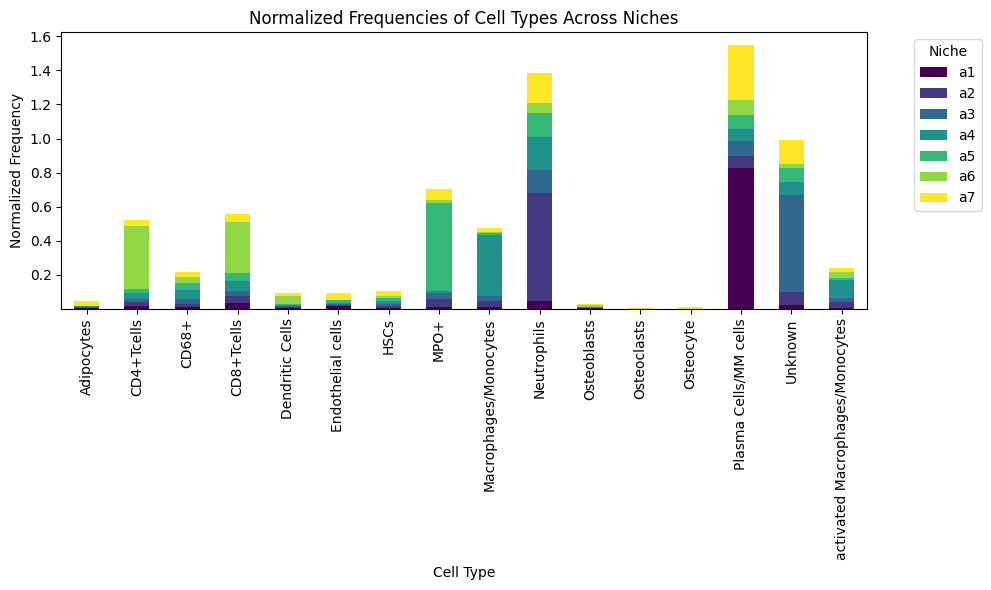

In [10]:
#create a barplot with cell types composition across NIPMAP niches 
cell_type_counts = data.groupby(['cell_type', 'niche']).size().unstack(fill_value=0)

#normalise & plot 
cell_type_normalized = cell_type_counts.div(cell_type_counts.sum(axis=0), axis=1)

cell_type_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Normalized Frequencies of Cell Types Across Niches")
plt.xlabel("Cell Type")
plt.ylabel("Normalized Frequency")
plt.legend(title="Niche", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

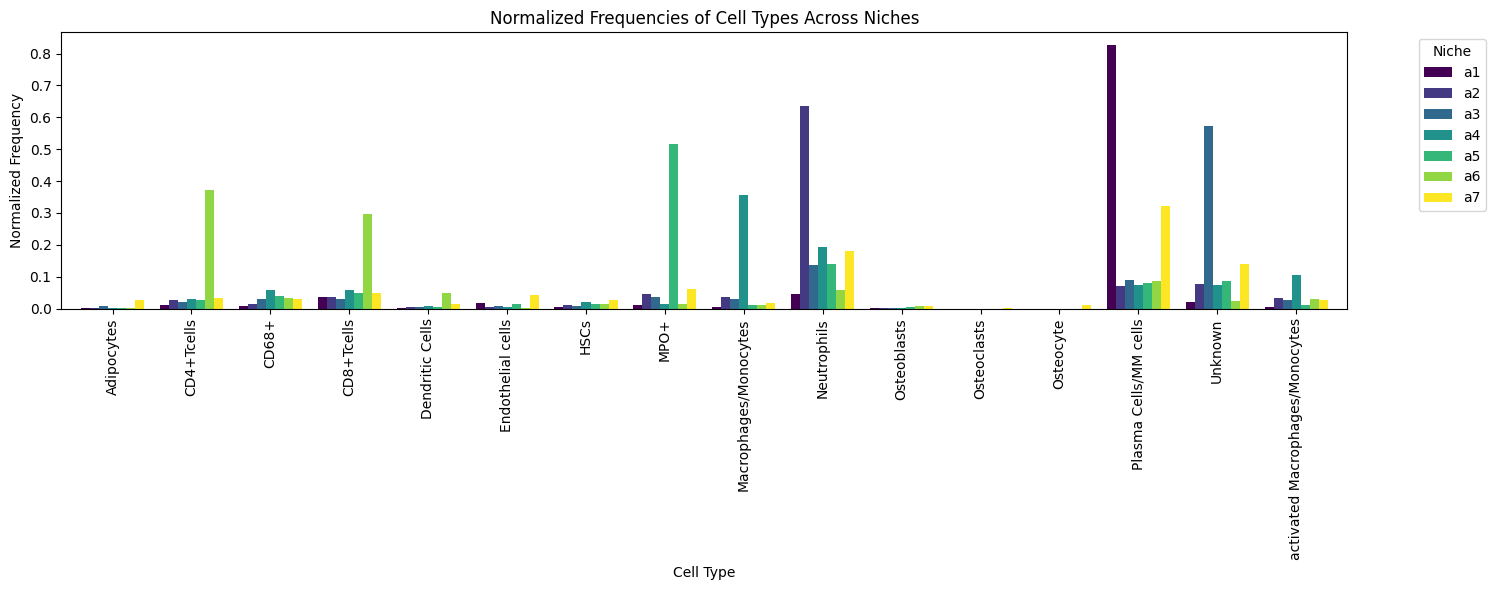

In [11]:
#create a barplot with cell types composition across NIPMAP niches - unstacked

cell_type_counts = data.groupby(['cell_type', 'niche']).size().unstack(fill_value=0)

#normalise and plot
cell_type_normalized = cell_type_counts.div(cell_type_counts.sum(axis=0), axis=1)

fig, ax = plt.subplots(figsize=(15, 6))

cell_type_normalized.plot(kind='bar', ax=ax, width=0.8, colormap='viridis')

plt.title("Normalized Frequencies of Cell Types Across Niches")
plt.xlabel("Cell Type")
plt.ylabel("Normalized Frequency")
plt.legend(title="Niche", bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


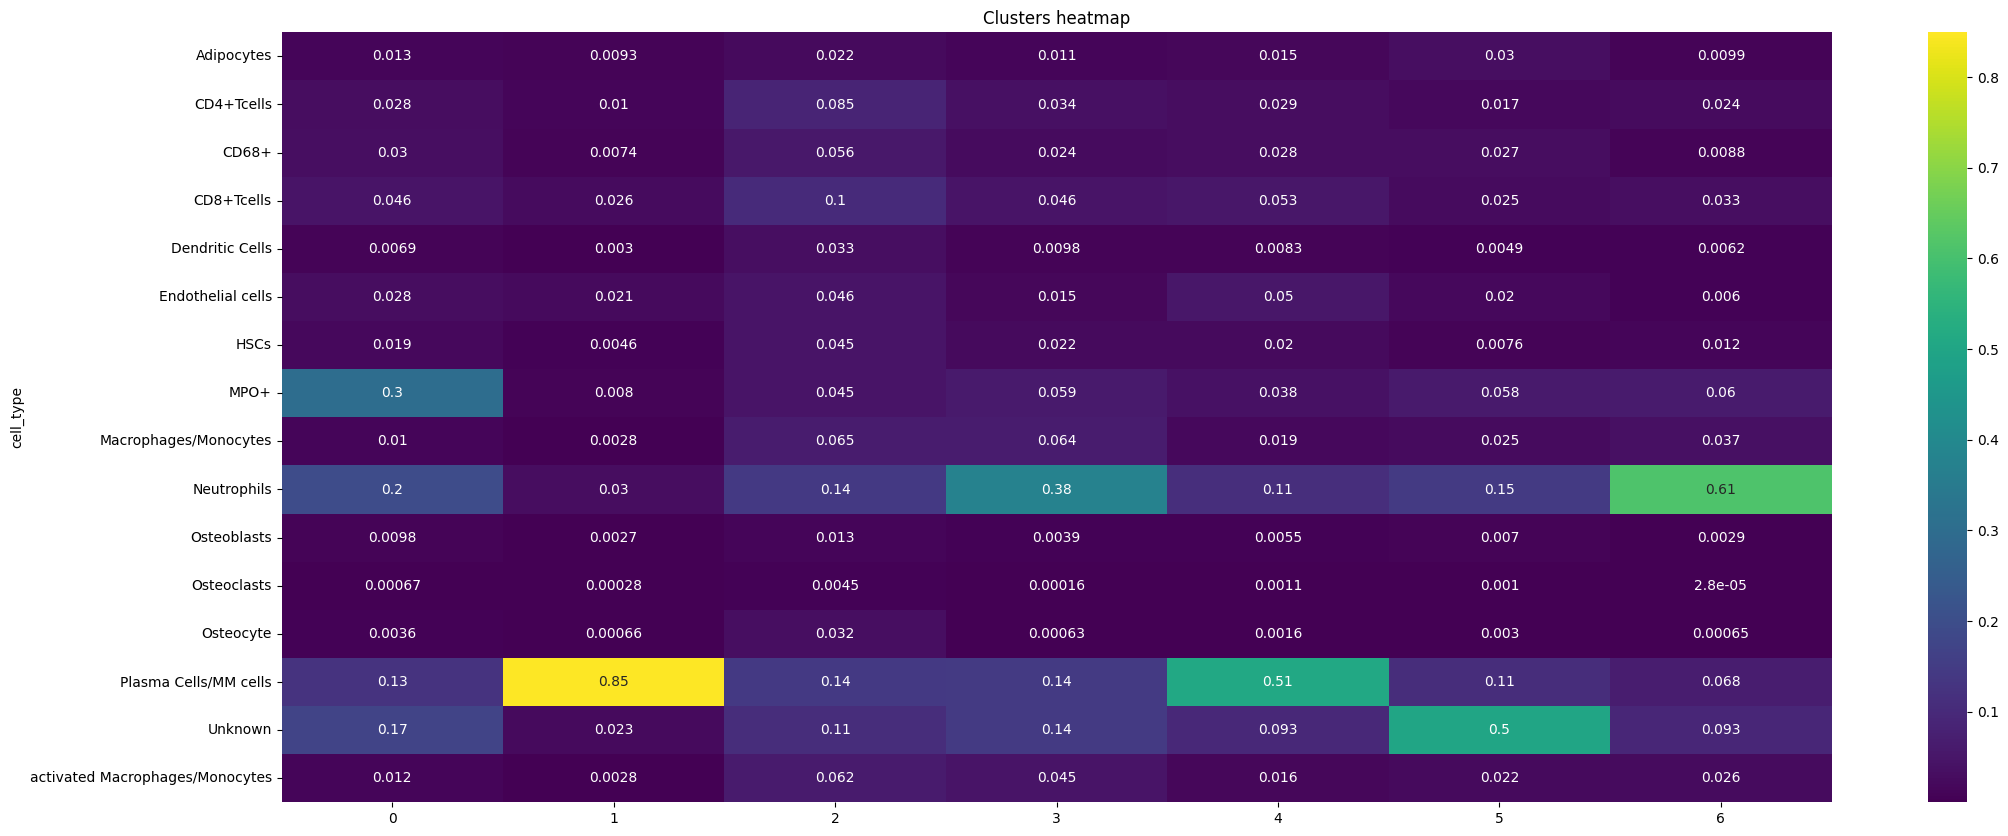

In [12]:
#plot seaborn heatmap with correlation of 7 k-means clusters from scimap with cell types 
plt.figure(figsize=(25, 10))
sns.heatmap(clusters, cmap='viridis', annot=True, cbar=True)

plt.title("Clusters heatmap")
plt.show()

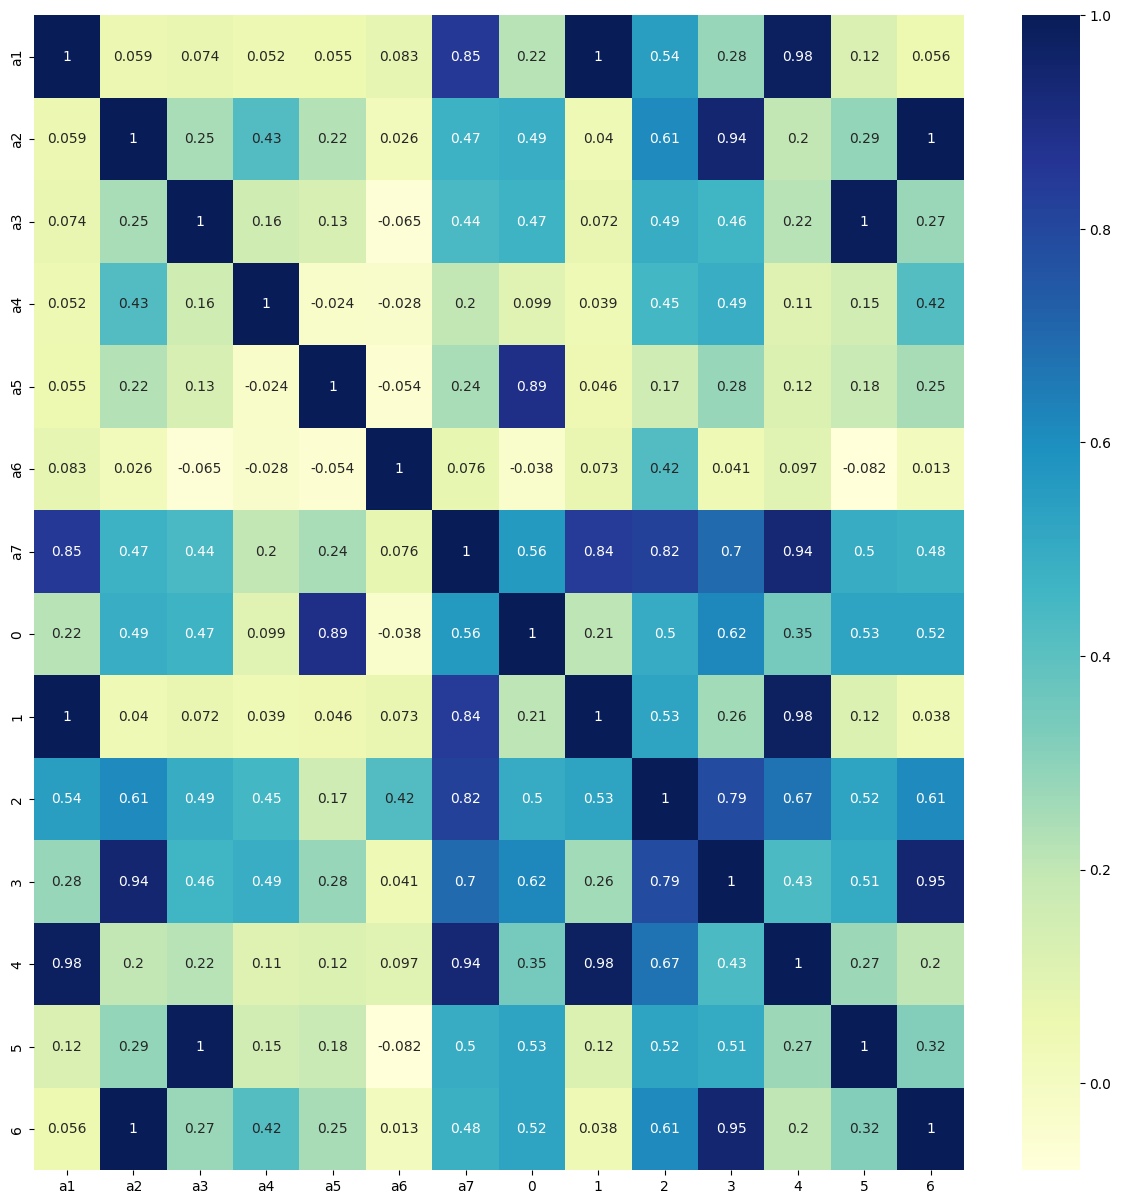

In [14]:
#plot correlation of 7 NIPMAP niches with 7 k-means clusters from scimap 

#merge two dataframes together 
niche_cluster = pd.merge(niches_counts_norm,clusters, on='cell_type', how='left')

fig, ax = plt.subplots(figsize=(15,15)) 

#create a correlation plot
corrplot = sns.heatmap(niche_cluster.corr(numeric_only=True), cmap="YlGnBu", annot=True)

plt.show()